# Principle Component Analysis

Article structure: 

1. What is PCA, what is a change of basis (find one that is most useful give example of CNN pixels vs dog-ness, cat-ness etc. etc.), why is it linear, why we want to reduce dimensions
2. what is a principle component, why are some bigger than others, show this in 2D
3. SVD algebra to show the connection between covar mat and data mat 
3. what does it mean to switch the the PCA basis -> is this interpretable sometimes will show trends
4. generalise ideas to 3d, give two examples, one where we can't really reduce and one where we can along with algebra to prove 
5. eigenfaces -> broad overview 
6. show the adding of more components 
7. what happens we have less data that features -> show that is cannot reproduce me as it doesn't span the space, give anology in 3D


This is the first article in a series about dimensionality reduction.

Principle Component Analysis (PCA) is a fundamental method used to reduce the dimensions of a problem. For a given dataset the principle components are the orthogonal directions in which data changes. The value of the principle components denote how important/how much information is given by one of the orthogonal directions. We reduce dimensions by discarding directions with small principle components/importantance.

I know there any many articles like this on medium in which PCA is explained and motivated though I believe this article offers a different perspective not only intuitively motivating the results but also algebraicly proving so too. 

We see that the singular values from the SVD are the square root of the eigenvalues of the covariance matrix 

$$\text{data} = \mathbf{A} = \mathbf{U \Sigma V^T}$$
$$\mathbf{A^T} = \mathbf{V \Sigma^T U^T}$$
$$\text{covar(data)} \propto \mathbf{A^TA} = \mathbf{V \Sigma^T U^T U \Sigma V^T} = \mathbf{V \Sigma^T \Sigma V^T}$$

Here is an example for SVD of a $3 \times 2 $ matrix. We can see that the covariance matrix has eigenvectors $\mathbf{V}$ with eigenvalues $\sigma_i^2$. NEED TO HAVE EXPLANATION HERE AS TO WHY THIS IS USEFUL 

$$ \mathbf{\Sigma^T \Sigma} = \begin{bmatrix} \sigma_1  & 0 & 0 \\ 0 & \sigma_2 & 0 \end{bmatrix} \begin{bmatrix} \sigma_1 & 0 \\ 0 & \sigma_2 \\ 0 & 0 \end{bmatrix} = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_2^2 \end{bmatrix}$$

There are only 400 images in the dataset, less than the $4096 \; 64 \times 64$ features of the features therefore the matrix is underdetermined

When in the principal component basis, are the axes scaled by the principle components?

# reducing dimensions 
We can represent the singular value decomposition as a sum: 

$$\text{data} = \sum_i \sigma_i \mathbf{u_i v_i}^T$$

We see that for small values of $\sigma_i$ we can leave it out and still reproduce the data to good accuracy. In PCA we get rid of values of $\sigma_i$ below a certain amount as this makes things quicker. In the example of this 3d plot we see that there is very little variation in one of the three orthogonal directions, meaning it has a small principle component so we can discount it. This leads to a data space in the principal component of only 2d i.e. we have reduced the dimensions from 3 to 2 (hence the term dimensionality reduction). The 2d plot is as if we are looking down the 3 axis. 

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces

plt.rcParams['text.usetex'] = True

In [24]:
# add in LaTeX plotting stuff 

def plot_ellipse(a, b, rot_ang=np.pi/4):

    # can plot the ellipse to (x,y) = (a*cos(t),b*sin(t))
    angles = np.linspace(0, 2*np.pi, 200)

    # why the factor of sqrt 2 here 
    ellipse = [a*np.cos(angles), b*np.sin(angles)]


    rot_mat = np.array([
        [np.cos(rot_ang), np.sin(rot_ang)],
        [-np.sin(rot_ang), np.cos(rot_ang)]
    ])


    ellipse = rot_mat @ ellipse 
    
    plt.plot(ellipse[0], ellipse[1])


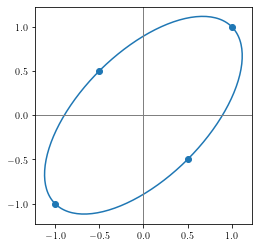

In [25]:
plot_ellipse(np.sqrt(2)/2, np.sqrt(2))

# first plot the points 
data = np.array([
    [1,1],
    [-1,-1],
    [0.5,-0.5],
    [-0.5,0.5],
])

x, y = zip(*data)

plt.scatter(x,y)
plt.axvline(c='grey', lw=1)
plt.axhline(c='grey', lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [26]:
covar = data.T @ data

covar

array([[2.5, 1.5],
       [1.5, 2.5]])

In [27]:
eigenvals, eigenvecs = np.linalg.eig(covar)

In [28]:
eigenvecs

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [29]:
np.sqrt(eigenvals) * eigenvecs

array([[ 1.41421356, -0.70710678],
       [ 1.41421356,  0.70710678]])

In [30]:
(np.sqrt(eigenvals) * eigenvecs.T).T

array([[ 1.41421356, -1.41421356],
       [ 0.70710678,  0.70710678]])

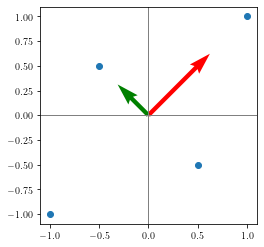

In [31]:
# plot principal components
prin_comp = np.sqrt(eigenvals) * eigenvecs
origin = np.array([[0, 0],[0, 0]]) # origin point
plt.quiver(*origin, prin_comp[0], prin_comp[1], color=['r','g'], scale=5, width=0.02)

plt.scatter(x,y)
plt.axvline(c='grey', lw=1)
plt.axhline(c='grey', lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

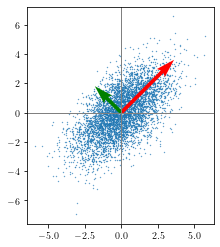

In [57]:
#plot_ellipse(4*np.sqrt(2)/2, 3.5*np.sqrt(2))

# remove this being hard-coded
covar = [
    [2.5,1.5],
    [1.5,2.5]
]


# now plot with may points
mean = np.zeros(2)
data = np.random.multivariate_normal([0,0], covar, size=5000)

x, y = zip(*data)

plt.scatter(x,y, s=0.1)

eigenvals, eigenvecs = np.linalg.eig(covar)
prin_comp = np.sqrt(eigenvals) * eigenvecs
origin = np.array([[0, 0],[0, 0]]) # origin point
plt.quiver(*origin, prin_comp[0], prin_comp[1], color=['r','g'], scale=5, width=0.02)

plt.axvline(c='grey', lw=1)
plt.axhline(c='grey', lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [58]:
covar = np.cov(data.T) 

covar

array([[2.44298129, 1.50304468],
       [1.50304468, 2.53327647]])

In [59]:
eigenvals, eigenvecs = np.linalg.eig(covar)

In [60]:
eigenvecs

array([[-0.71764333, -0.69641084],
       [ 0.69641084, -0.71764333]])

In [61]:
eigenvals

array([0.98440629, 3.99185147])

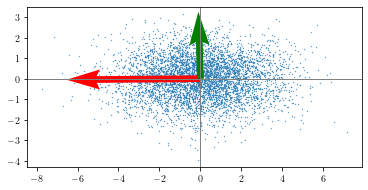

In [62]:
# add in projection into principle component basis
# show example in 3d where third dimension doesn't really add much 
# transform the eigen values but make sure to explain why this is trivial 

U, w, Vt = np.linalg.svd(data)

data = Vt @ data.T 
plt.scatter(data[0], data[1], s=0.1)

# make it so that the vector cannot be negative
#prin_comp = Vt.T @ prin_comp.T
origin = np.array([[0, 0],[0, 0]]) # origin point
plt.quiver(*origin, Vt @ prin_comp.T[0], Vt @ prin_comp.T[1], color=['r','g'], scale=5, width=0.02)

plt.axvline(c='grey', lw=1)
plt.axhline(c='grey', lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [38]:
Vt @ prin_comp.T[0]

array([-1.99999789, -0.0029058 ])

/var/folders/yr/nz2d8_8n42g11zxgd7yjxhq40000gn/T/ipykernel_85187/4222207452.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal([0,0,0], covar_3d, size=100)


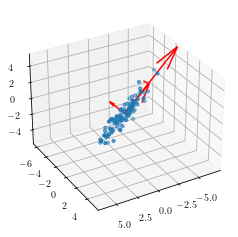

In [116]:
fig = plt.figure()
ax = plt.axes(projection='3d')

covar_3d = [
    [5,4,1],
    [4,5,4],
    [1,4,5]
]

data = np.random.multivariate_normal([0,0,0], covar_3d, size=100)
x, y, z = data.T

ax.scatter3D(x,y,z,s=10, marker='o')

covar = np.cov(data.T)
eigenvals, eigenvecs = np.linalg.eig(covar)
prin_comp = np.sqrt(eigenvals) * eigenvecs
origin = np.array([[0,0,0],[0,0,0], [0,0,0]]) # origin point
ax.quiver(*origin, prin_comp[0], prin_comp[1], prin_comp[2], length=5, color='r')#, normalize=True)#, width=0.02)
ax.view_init(30, 60)
plt.show()

In [120]:
# find eigenstuff of 3d dataset 
covar = np.cov(data.T)
eigenvals, eigenvecs = np.linalg.eig(covar)

In [122]:
# but we can get rid of the third direction as varaition in this direction is very small
_, _, Vt = np.linalg.svd(data)

# how do we best represent the squishing?

ValueError: operands could not be broadcast together with shapes (2,) (3,3) 

In [119]:
np.sqrt(w)

array([5.79840897, 4.32420843, 1.93327356])

# Eigenfaces

The olivetti face dataset is made up of 10 different images of 40 people for a total of 400 images. The $64 \times 64$ photos can be flattened into a $4096$ vector. We can then carry out PCA to find the directions in which the 

In [40]:
data = fetch_olivetti_faces()
imgs = data.images
print(imgs.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/harryshaw/scikit_learn_data
(400, 64, 64)


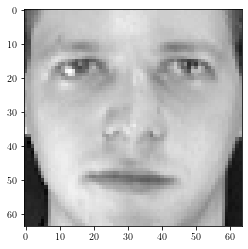

In [41]:
plt.imshow(imgs[0], cmap='gray')

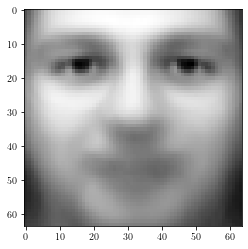

In [42]:
plt.imshow(np.mean(imgs, axis=0), cmap='gray')

In [43]:
imgs = imgs.reshape(400,-1)
imgs.shape

(400, 4096)

In [44]:
U, w, Vt = np.linalg.svd(imgs)

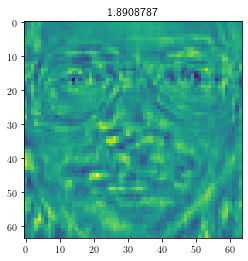

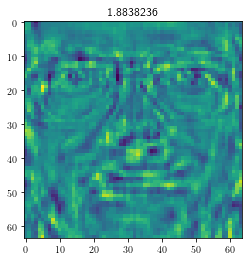

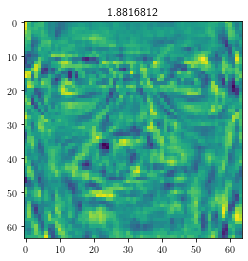

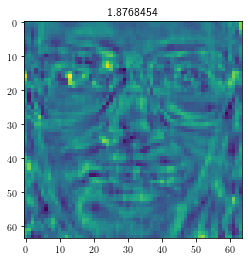

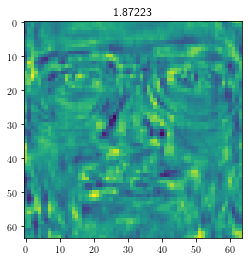

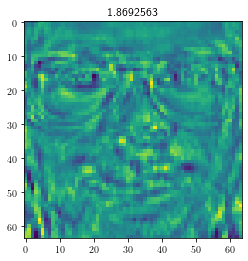

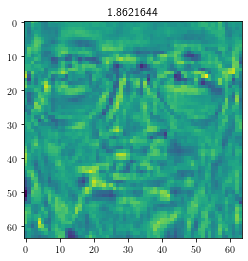

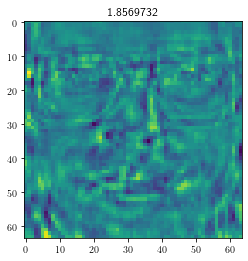

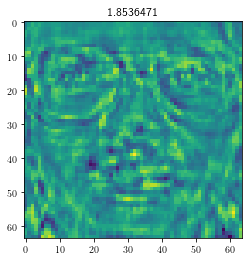

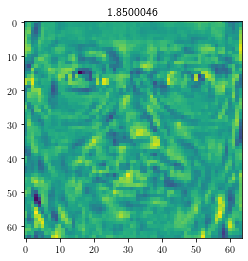

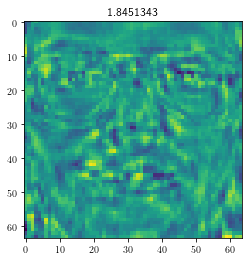

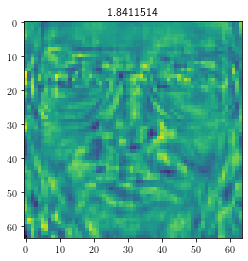

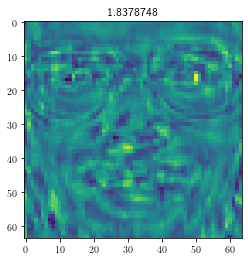

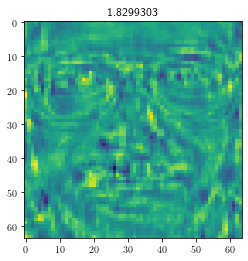

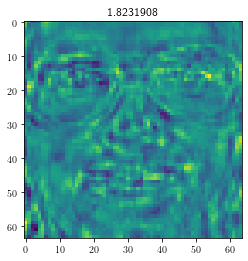

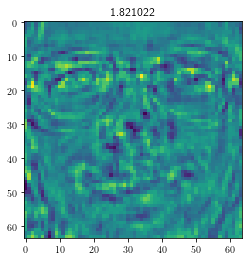

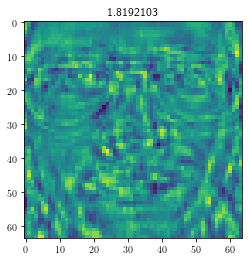

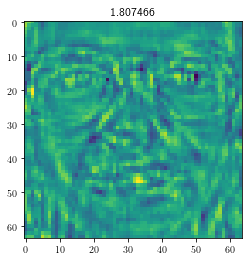

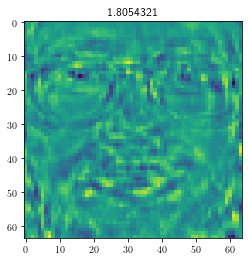

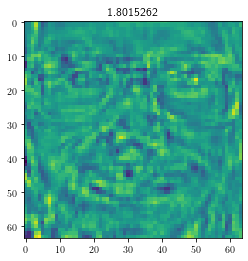

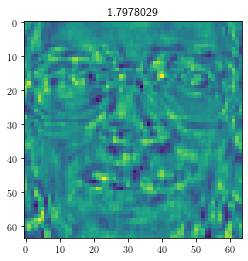

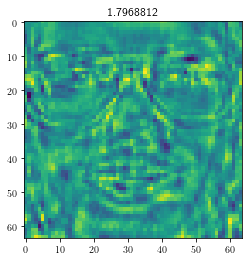

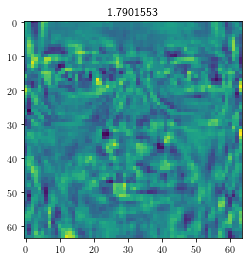

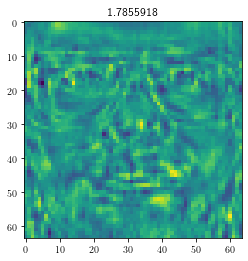

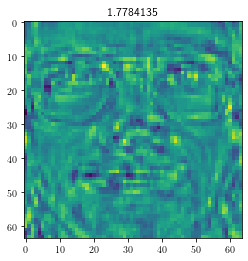

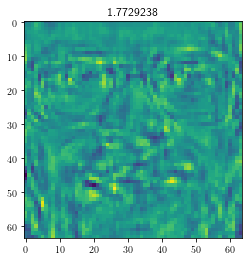

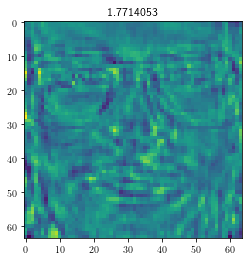

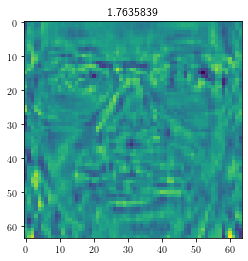

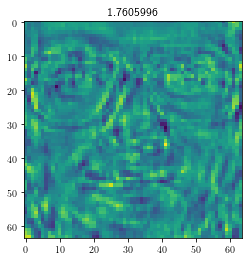

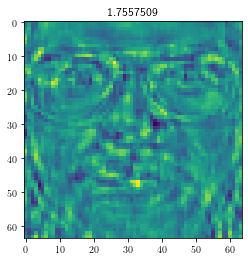

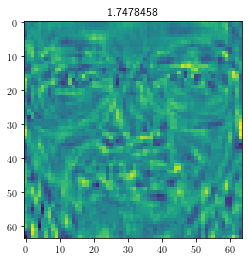

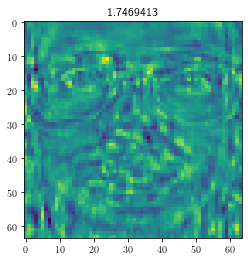

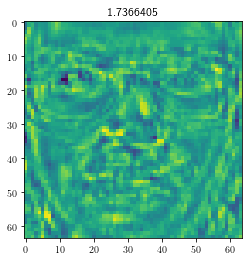

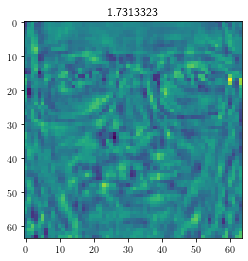

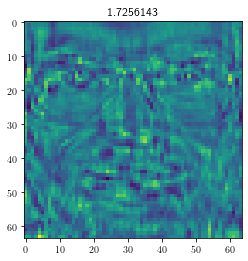

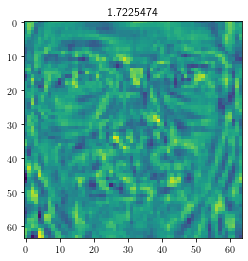

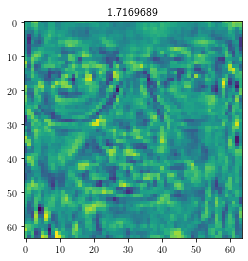

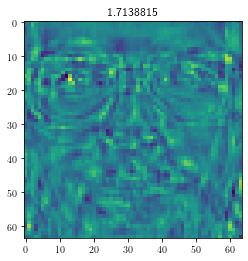

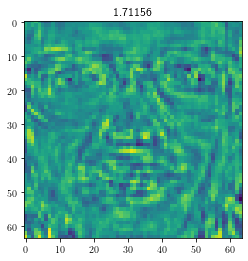

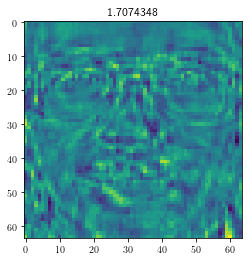

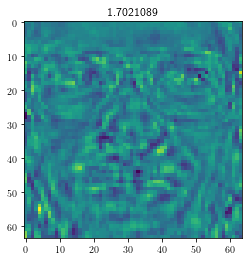

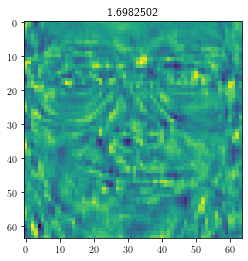

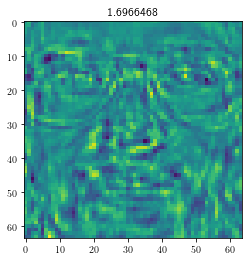

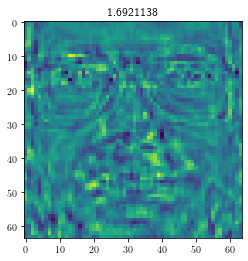

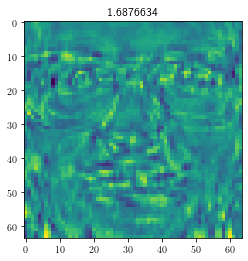

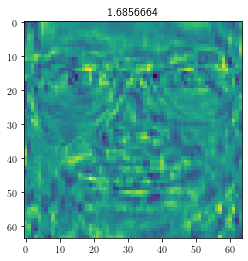

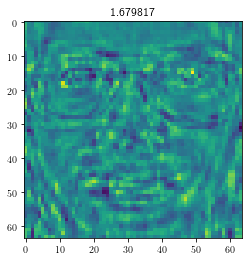

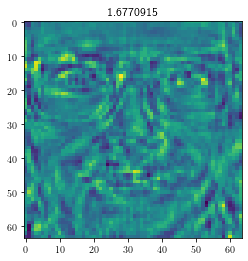

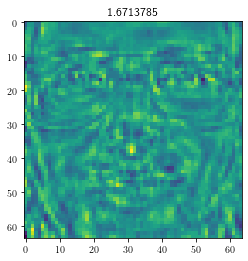

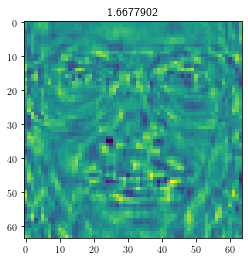

In [45]:
for i in range(150,200):

    plt.title(np.sqrt(w[i]))
    plt.imshow(Vt[i].reshape(64,64))
    plt.show()

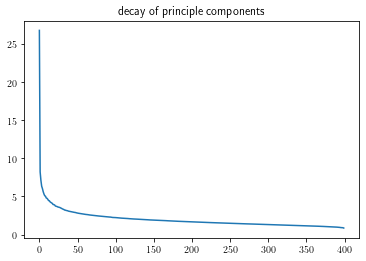

In [46]:
# decay of 
plt.title('decay of principle components')
plt.plot(np.sqrt(w))

In [47]:
imgs.shape

(400, 4096)

In [48]:
coef = Vt @ imgs[0]

coef

array([-4.1219818e+01, -7.6485866e-01, -2.1319959e+00, ...,
        2.3096800e-07, -7.4505806e-09,  2.0861626e-07], dtype=float32)

In [49]:
linear_comb = coef[:400] * Vt.T[:,:400]

linear_comb.shape

(4096, 400)

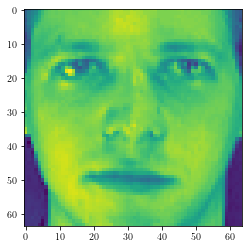

In [50]:
plt.imshow(np.mean(linear_comb, axis=-1).reshape(64,64))
plt.show()

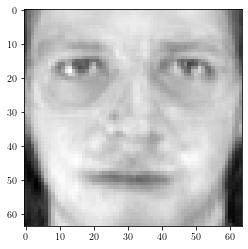

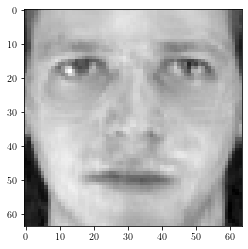

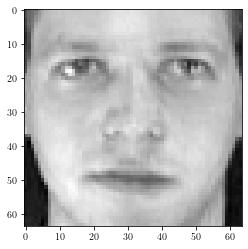

In [51]:
# now take the first 20 components
for i in range(1,4):
    plt.imshow(np.mean(linear_comb[:,:i*100], axis=-1).reshape(64,64), cmap='gray')
    plt.show()

In [52]:
sorted(coef[:400])

[-41.21982,
 -2.131996,
 -1.1536448,
 -1.0166018,
 -0.9696014,
 -0.76485866,
 -0.600834,
 -0.5854635,
 -0.5538135,
 -0.5242177,
 -0.50755185,
 -0.50579965,
 -0.47863108,
 -0.45708168,
 -0.45426288,
 -0.4459959,
 -0.4339266,
 -0.42975098,
 -0.38727486,
 -0.3655699,
 -0.35582045,
 -0.34388238,
 -0.303139,
 -0.3027585,
 -0.28625312,
 -0.28624272,
 -0.28571504,
 -0.28067556,
 -0.27161014,
 -0.26694033,
 -0.26653293,
 -0.26553163,
 -0.2542989,
 -0.2396097,
 -0.23859504,
 -0.23659459,
 -0.23474163,
 -0.22901744,
 -0.21839014,
 -0.21815234,
 -0.21711019,
 -0.20382528,
 -0.20244995,
 -0.20116755,
 -0.20069276,
 -0.19889204,
 -0.19766116,
 -0.19741318,
 -0.18861336,
 -0.1864031,
 -0.18639654,
 -0.17005032,
 -0.16944897,
 -0.16805625,
 -0.1665971,
 -0.16219717,
 -0.16059811,
 -0.15966946,
 -0.15915757,
 -0.1579668,
 -0.15511139,
 -0.14862075,
 -0.14854771,
 -0.14676702,
 -0.14543402,
 -0.14521289,
 -0.14451095,
 -0.14314407,
 -0.14267719,
 -0.14220549,
 -0.13703221,
 -0.13688973,
 -0.13589035,
 

In [53]:
np.where(coef == 3.91819)

(array([4]),)

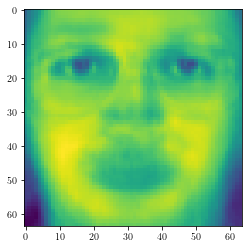

In [54]:
plt.imshow(np.mean(linear_comb[:,:10], axis=-1).reshape(64,64))

In [55]:
# try to construct photo from out of the data set to explain what is going on with the degenerate subspace